In [30]:
# Empiezo importando las librerias que usar en el projecto


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [31]:
# creo un DataFrame en pandas(pd) a partir de los datos contenidos en dataset_final.cvs

df = pd.read_csv("/Users/benjaminzelaya/Desktop/ML_Proyecto_Individual_Henry/ETL - EDA/Analisis Exploratorio Datos/movies_data_final.csv")

# Imprimo los primeros registros del DataFrame
df.head()

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,Released,NaN,Toy Story,7.7,...,Animation,16.0,Pixar Animation Studios,3.0,US,United States of America,30000000,373554033.0,1995,12.451801
1,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,...,Comedy,35.0,TriStar Pictures,559.0,US,United States of America,65000000,262797249.0,1995,4.043035
2,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,...,Family,10751.0,Teitler Film,2550.0,US,United States of America,0,0.0,1995,0.000000
3,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,...,Adventure,12.0,Interscope Communications,10201.0,US,United States of America,16000000,81452156.0,1995,5.090760
4,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,...,Fantasy,14.0,Warner Bros.,6194.0,US,United States of America,0,76578911.0,1995,0.000000


In [32]:
df.columns

Index(['id', 'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'id_bellongs_to_collection', 'name_bellongs_to_collection',
       'poster_bellongs_to_collection', 'backdrop_bellongs_to_collection',
       'Cod_languages', 'name_languages', 'name_genres', 'id_genres',
       'name_companies', 'id_companies', 'Cod_countries', 'country_name',
       'budget', 'revenue', 'release_year', 'return'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55619 entries, 0 to 55618
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               55619 non-null  int64  
 1   original_language                55604 non-null  object 
 2   overview                         54567 non-null  object 
 3   popularity                       55619 non-null  float64
 4   release_date                     55619 non-null  object 
 5   runtime                          55351 non-null  float64
 6   status                           55536 non-null  object 
 7   tagline                          25319 non-null  object 
 8   title                            55619 non-null  object 
 9   vote_average                     55619 non-null  float64
 10  vote_count                       55619 non-null  float64
 11  id_bellongs_to_collection        3969 non-null   float64
 12  name_bellongs_to_c

In [34]:
df.columns

Index(['id', 'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'id_bellongs_to_collection', 'name_bellongs_to_collection',
       'poster_bellongs_to_collection', 'backdrop_bellongs_to_collection',
       'Cod_languages', 'name_languages', 'name_genres', 'id_genres',
       'name_companies', 'id_companies', 'Cod_countries', 'country_name',
       'budget', 'revenue', 'release_year', 'return'],
      dtype='object')

In [35]:
df.isnull().mean()


id                                 0.000000
original_language                  0.000270
overview                           0.018914
popularity                         0.000000
release_date                       0.000000
runtime                            0.004818
status                             0.001492
tagline                            0.544778
title                              0.000000
vote_average                       0.000000
vote_count                         0.000000
id_bellongs_to_collection          0.928639
name_bellongs_to_collection        0.928639
poster_bellongs_to_collection      0.928639
backdrop_bellongs_to_collection    0.928639
Cod_languages                      0.032129
name_languages                     0.043798
name_genres                        0.010194
id_genres                          0.010194
name_companies                     0.093511
id_companies                       0.093511
Cod_countries                      0.111724
country_name                    

In [36]:
# quiero analizar las medidas para cada columna numérica que contenga el dataset.
df.describe()

# count: Número de valores no nulos presentes en la columna.
# mean: El promedio aritmético de los valores en la columna.
# Desviación estándar (std): La medida de la dispersión o variabilidad de los valores en la columna.
# Valor mínimo (min): El valor mínimo presente en la columna.
#Percentil 25 (25%): El valor por debajo del cual cae el 25% de los datos ordenados en la columna (primer cuartil).
#Percentil 50 (50%): También conocido como la mediana, es el valor que divide a los datos ordenados en la columna en dos partes iguales.
#Percentil 75 (75%): El valor por debajo del cual cae el 75% de los datos ordenados en la columna (tercer cuartil).
# Valor máximo (max): El valor máximo presente en la columna.

,id,popularity,runtime,vote_average,vote_count,id_bellongs_to_collection,id_genres,id_companies,budget,revenue,release_year,return
count,55619.000000,55619.000000,55351.000000,55619.000000,55619.000000,3969.000000,55052.000000,50418.000000,5.561900e+04,5.561900e+04,55619.000000,5.561900e+04
mean,105543.091480,3.208076,96.180105,5.685109,127.459969,151484.725876,2155.251344,12550.439050,5.059902e+06,1.273479e+07,1993.268829,5.386004e+02
std,111986.240568,6.357688,37.657904,1.861475,536.592385,134880.933989,4197.256946,19061.423762,1.910729e+07,6.866782e+07,22.912030,6.746606e+04
min,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,12.000000,1.000000,0.000000e+00,0.000000e+00,1874.000000,0.000000e+00
25%,24414.000000,0.436684,86.000000,5.100000,4.000000,37261.000000,18.000000,915.000000,0.000000e+00,0.000000e+00,1981.000000,0.000000e+00
50%,56800.000000,1.256144,96.000000,6.000000,11.000000,110021.000000,35.000000,6033.000000,0.000000e+00,0.000000e+00,2002.000000,0.000000e+00
75%,150229.500000,4.339898,108.000000,6.800000,41.000000,245326.000000,99.000000,13167.750000,0.000000e+00,0.000000e+00,2011.000000,0.000000e+00
max,469172.000000,547.488298,1256.000000,10.000000,14075.000000,479888.000000,29812.000000,96053.000000,3.800000e+08,2.787965e+09,2020.000000,1.239638e+07


## Distribucion de valores

# ANALISIS DE INGRESOS Y PRESUPUESTOS DE PELICULAS DEL DATASET

In [40]:
# Ordena el DataFrame por la columna 'revenue' en orden descendente
orden_revenue = df.sort_values(by='revenue', ascending=False)
orden_revenue

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
18778,19995,en,"In the 22nd century, a paraplegic Marine is di...",185.070892,2009-12-10,162.0,Released,Enter the World of Pandora.,Avatar,7.2,...,Thriller,53.0,Cannon Group,1444.0,US,United States of America,237000000,2.787965e+09,2009,11.763566
33493,140607,en,Thirty years after defeating the Galactic Empi...,31.626013,2015-12-15,136.0,Released,Every generation has a story.,Star Wars: The Force Awakens,7.5,...,Drama,18.0,M6,11261.0,US,United States of America,245000000,2.068224e+09,2015,8.441729
2095,597,en,"84 years later, a 101-year-old woman named Ros...",26.889070,1997-11-18,194.0,Released,Nothing on Earth could come between them.,Titanic,7.5,...,Horror,27.0,European Co-production Fund,30226.0,US,United States of America,200000000,1.845034e+09,1997,9.225171
22844,24428,en,When an unexpected enemy emerges and threatens...,89.887648,2012-04-25,143.0,Released,Some assembly required.,The Avengers,7.4,...,Comedy,35.0,Full Moon Entertainment,4867.0,US,United States of America,220000000,1.519558e+09,2012,6.907081
31755,135397,en,Twenty-two years after the events of Jurassic ...,32.790475,2015-06-09,124.0,Released,The park is open.,Jurassic World,6.5,...,Fantasy,14.0,Bauer Martinez Studios,34999.0,US,United States of America,150000000,1.513529e+09,2015,10.090192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23419,17775,en,Various lives intersect over the course of 48 ...,0.310111,2008-01-01,89.0,Released,NaN,Toronto Stories,4.8,...,Comedy,35.0,Walt Disney Television Animation,3475.0,CA,Canada,0,0.000000e+00,2008,0.000000
23420,70955,fr,An adolescent groupie zeroes in on her Blondie...,0.198165,2005-11-16,112.0,Released,NaN,Backstage,6.8,...,Western,37.0,MK2 Productions,9209.0,FR,France,0,0.000000e+00,2005,0.000000
23421,20186,en,Gails agoraphobia keeps her inside where she e...,0.839591,2008-05-17,93.0,Released,NaN,Better Things,6.1,...,Comedy,35.0,Fidélité Productions,147.0,GB,United Kingdom,0,0.000000e+00,2008,0.000000
23422,99642,fr,A 2002 French experimental film directed by Ph...,0.866735,2002-11-27,102.0,Released,Are you ready?,A New Life,7.0,...,Comedy,35.0,Les Films Alain Sarde,635.0,FR,France,0,0.000000e+00,2002,0.000000


In [38]:
import pandas as pd

# Eliminar la fila duplicada (por id o título de película)
df = df.drop_duplicates(subset=['id', 'title'])

In [39]:
# Ordena el DataFrame por la columna 'budget' en orden descendente
orden_budget = df.sort_values(by='budget', ascending=False)
orden_budget

,id,original_language,overview,popularity,release_date,runtime,status,tagline,title,vote_average,...,name_genres,id_genres,name_companies,id_companies,Cod_countries,country_name,budget,revenue,release_year,return
22008,1865,en,Captain Jack Sparrow crosses paths with a woma...,27.887720,2011-05-14,136.0,Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,...,Fantasy,14.0,Paramount Pictures,4.0,US,United States of America,380000000,1.045714e+09,2011,2.751878
15261,285,en,"Captain Barbossa, long believed to be dead, ha...",31.363664,2007-05-19,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,...,Romance,10749.0,Paramount Pictures,4.0,US,United States of America,300000000,9.610000e+08,2007,3.203333
33499,99861,en,When Tony Stark tries to jumpstart a dormant p...,37.379420,2015-04-22,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,...,Romance,10749.0,Crescendo Productions,3314.0,US,United States of America,280000000,1.405404e+09,2015,5.019299
14243,1452,en,Superman returns to discover his 5-year absenc...,13.284712,2006-06-28,154.0,Released,NaN,Superman Returns,5.4,...,Comedy,35.0,ApolloMedia Distribution,16850.0,US,United States of America,270000000,3.910812e+08,2006,1.448449
20761,38757,en,When the kingdom's most wanted-and most charmi...,14.684761,2010-11-24,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,...,Western,37.0,Miramax Films,14.0,US,United States of America,260000000,5.917949e+08,2010,2.276134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23626,70149,en,"NELU, a man in his forties, works as a securit...",0.141908,2010-10-01,100.0,Released,NaN,Morgen,5.5,...,War,10752.0,Sunflower Productions,22253.0,FR,France,0,0.000000e+00,2010,0.000000
23629,57046,en,"Scarlet Zabrinski, a successful, hard edged, L...",0.911940,2005-05-18,0.0,Released,Has Scarlet met her match?,"What's Up, Scarlet?",5.0,...,Drama,18.0,Norsk Filmfond,46201.0,NaN,NaN,0,0.000000e+00,2005,0.000000
23631,58391,fi,"Three middle aged men, long time friends, get ...",0.239772,2008-11-14,0.0,Released,NaN,Three Wise Men,5.0,...,Mystery,9648.0,SF Norge Filmparken,53901.0,FI,Finland,0,0.000000e+00,2008,0.000000
23632,86457,en,"Sexy Texas gal storms her way through life, br...",0.384612,1932-11-27,88.0,Released,SHE'S BACK...and greater than ever,Call Her Savage,3.5,...,Thriller,53.0,Samy Boy Entertainment,53902.0,US,United States of America,0,0.000000e+00,1932,0.000000


/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_39348/2695952826.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_movies_by_revenue['title'], rotation=45, ha='right')


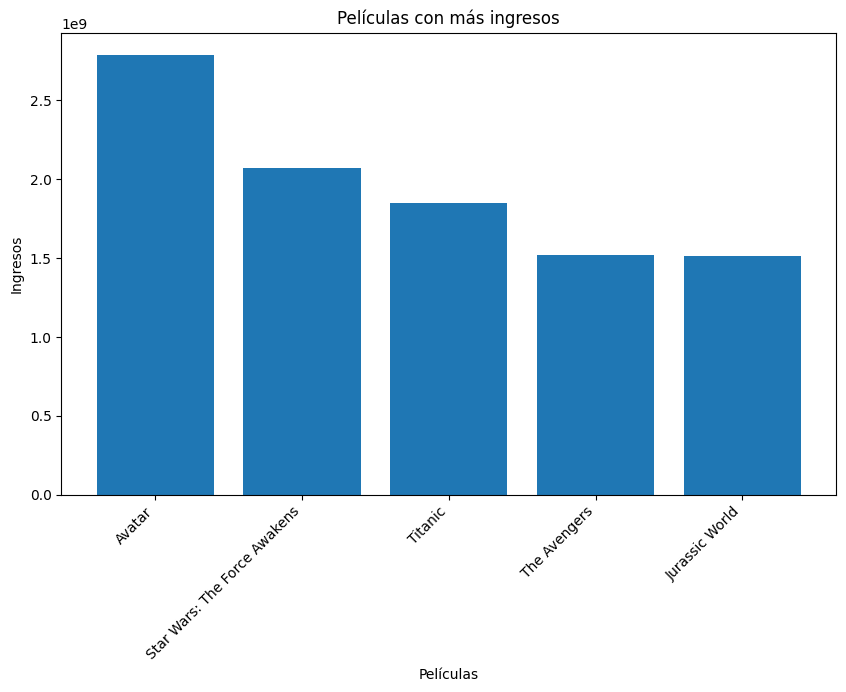

In [41]:


#  DataFrame por ingresos (revenue) y presupuesto (budget) en orden descendente
df_sorted_by_revenue = df.sort_values(by='revenue', ascending=False)
df_sorted_by_budget = df.sort_values(by='budget', ascending=False)

top_movies_by_revenue = df_sorted_by_revenue.head(5)  
top_movies_by_budget = df_sorted_by_budget.head(5)   

# gráfico de barras para ingresos
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_movies_by_revenue['title'], top_movies_by_revenue['revenue'])
ax.set_xlabel('Películas')
ax.set_ylabel('Ingresos')
ax.set_title('Películas con más ingresos')
ax.set_xticklabels(top_movies_by_revenue['title'], rotation=45, ha='right')

plt.show()





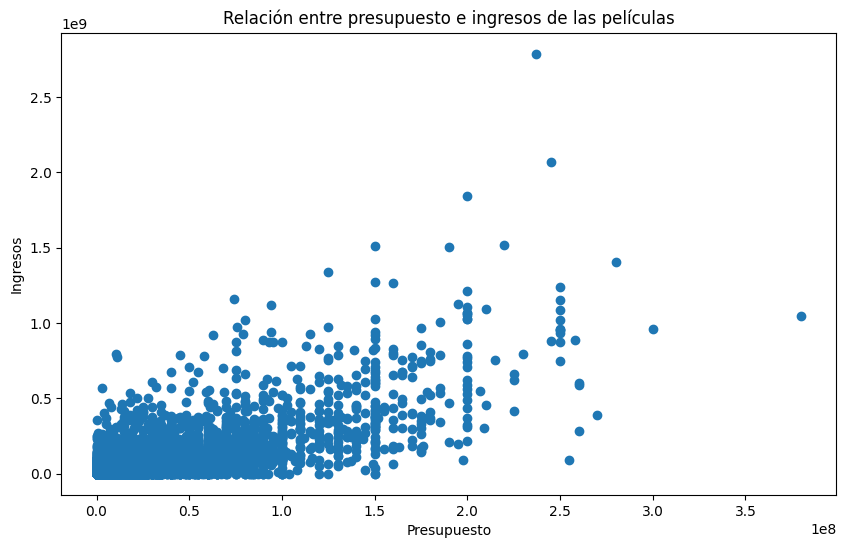

In [52]:
# gráfico de dispersión para visualizar los ingresos y presupuestos de las películas
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['budget'], df['revenue'])
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Ingresos')
ax.set_title('Relación entre presupuesto e ingresos de las películas')

plt.show()

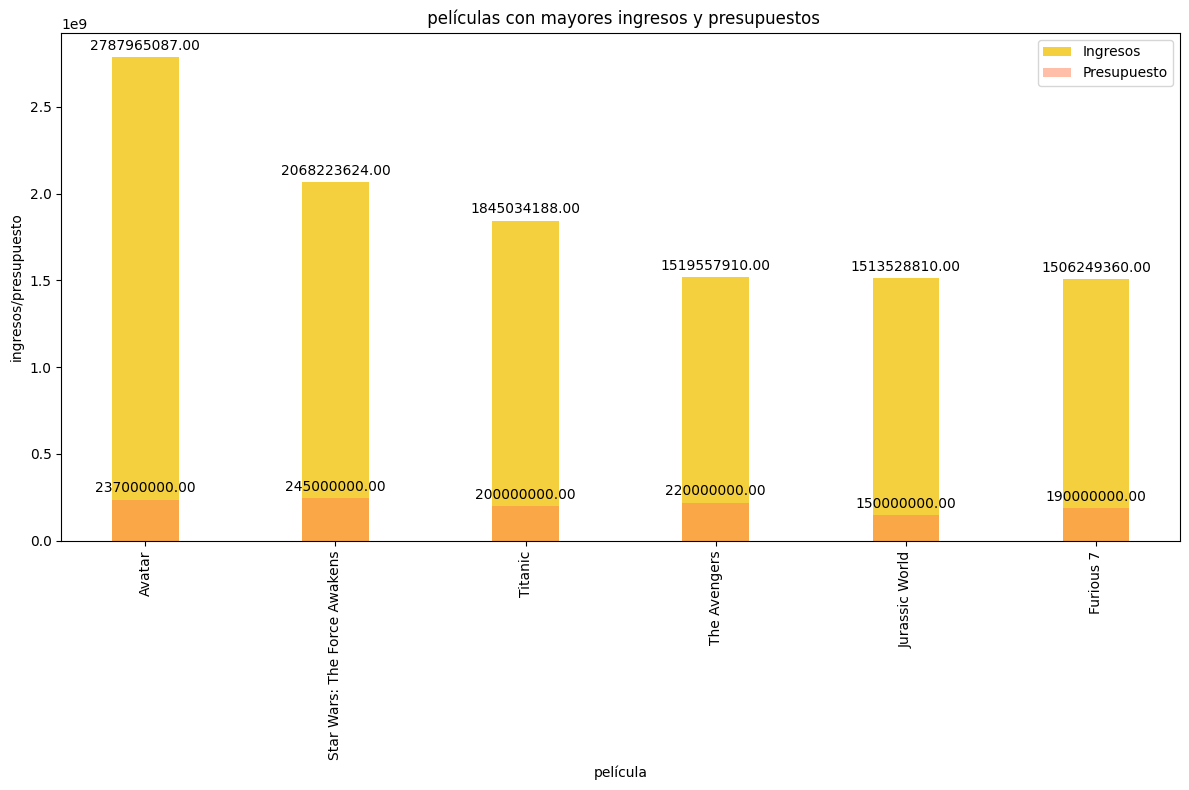

In [43]:
df_sorted = df.sort_values(by='revenue', ascending=False)
# películas con mayores ingresos
top_n = 6
top_movies = df_sorted.head(top_n)

#  datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']


#colores en tonos pasteles
colors = ['#F4D03F', '#FF7F50']

# gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color=colors[0])
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color=colors[1])

# estilo del gráfico
ax.set_xlabel('película')
ax.set_ylabel('ingresos/presupuesto')
ax.set_title(f' películas con mayores ingresos y presupuestos')
ax.legend()

# etiquetas
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Peliculas por Paises y por Lenguajes

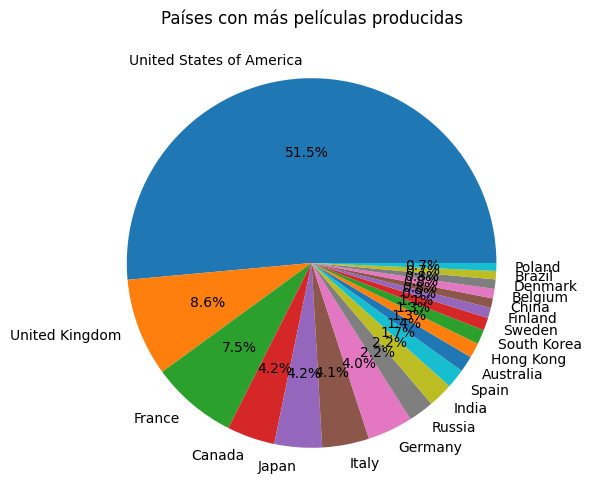

In [44]:
# películas por país
country_counts = df['country_name'].value_counts()

# número de países 
num_countries = 20  # el numero de paises puede modificarse si se quieren ver mas.
top_countries = country_counts.head(num_countries)

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Países con más películas producidas')

# Mostrar la gráfica
plt.show()



* CLARAMENTE SE VE LA MAYOR PRODUCCION ESTA EN ESTADOS UNIDOS,SEGUIDO DE REINO UNIDO Y FRANCIA.

# Peliculas por Lenguajes 

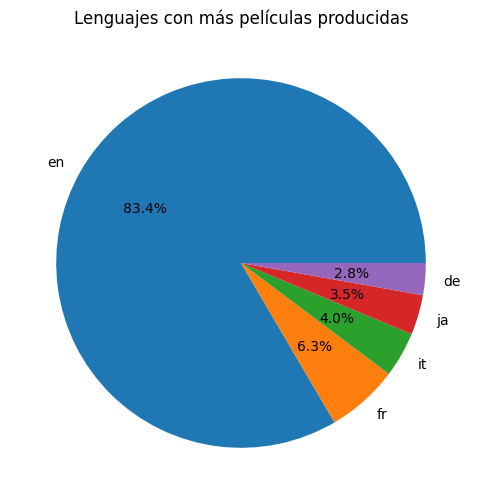

In [50]:
# recuento de películas por idioma
language_counts = df['original_language'].value_counts()

#  número de idiomas para mostrar en la gráfica
num_language = 5
top_language = language_counts.head(num_language)

# Gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_language, labels=top_language.index, autopct='%1.1f%%')
plt.title('Lenguajes con más películas producidas')
plt.show()

* Prodemos observar que el lenguaje que tiene mas peliculas es el ingles con un 83.4%, seguido del frances con un 6.3% y despues italiano 4.0%.

# Los 10 Año con mayor cantidad de peliculas realizadas

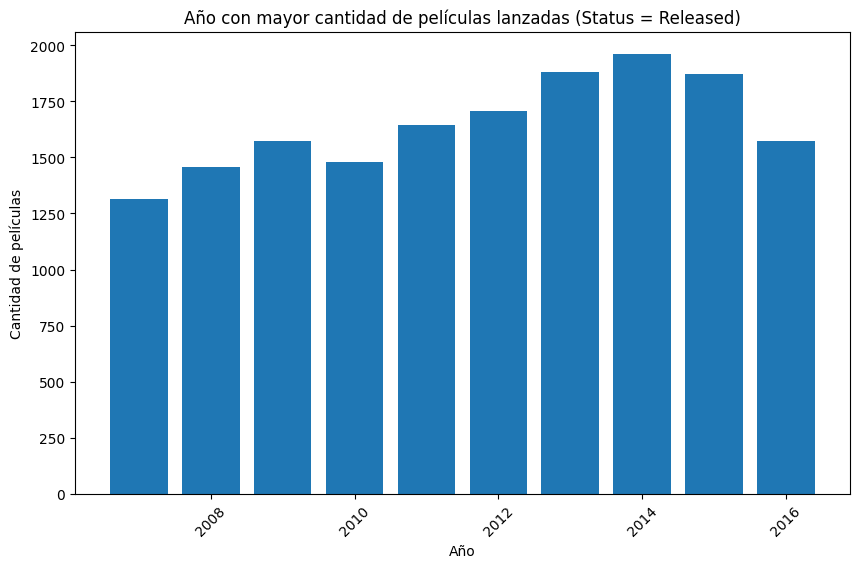

In [64]:
df_released = df[df['status'] == 'Released']

# recuento de películas por año para las películas 'Released'
year_counts = df_released['release_year'].value_counts()

num_year = 10
top_year = year_counts.head(num_year)



# gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_year.index, top_year.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Año con mayor cantidad de películas lanzadas (Status = Released)')
plt.xticks(rotation=45)  


plt.show()


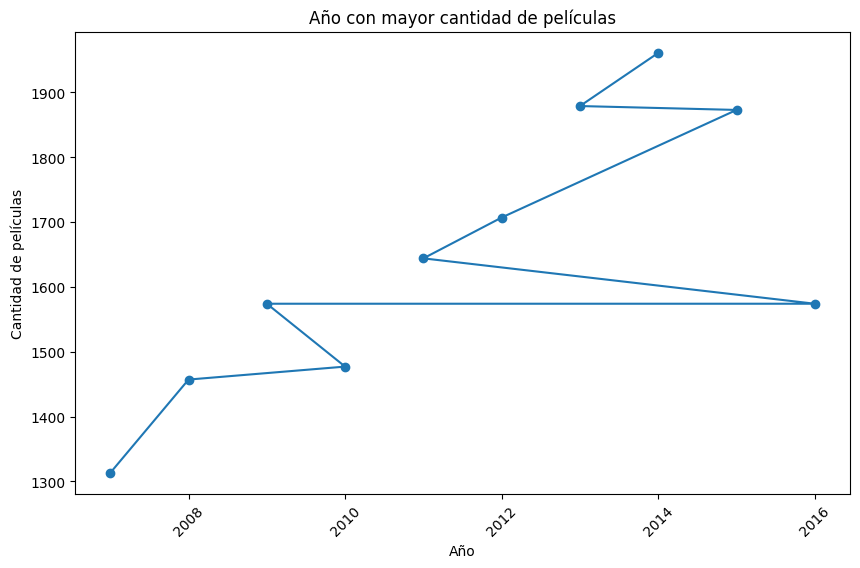

In [66]:
df_released = df[df['status'] == 'Released']

# recuento de películas por año para las películas 'Released'
year_counts = df_released['release_year'].value_counts()

num_year = 10
top_year = year_counts.head(num_year)

top_year.index = top_year.index.astype(int)

# gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(top_year.index, top_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Año con mayor cantidad de películas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad


plt.show()

# Correlacion entre variables del dataset



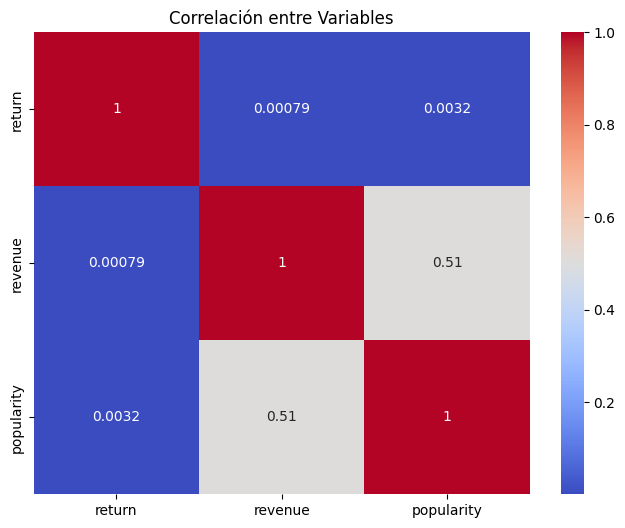

In [74]:

selected_vars = ['return', 'revenue','popularity']
selected_df = df[selected_vars]

correlation_matrix = selected_df.corr()

# mapa de calor 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()



* En el mapa de calor, podemos ver que 'revenue' y 'popularity' tienen una correlación positiva moderada, lo cual se representa con colores más oscuros. Esto sugiere que las películas con mayor popularidad tienden a generar mayores ingresos. Es decir, cuando una película es más popular entre el público, es probable que genere más ingresos.

* La correlación entre 'return' y 'popularity' es cercana a cero, lo cual se muestra con colores más neutros en el mapa de calor. Esto indica que no hay una relación lineal fuerte entre la tasa de retorno y la popularidad de una película. Es decir, la popularidad de una película no necesariamente está asociada con una alta o baja tasa de retorno.

* Al igual que con 'popularity', la correlación entre 'return' y 'revenue' también es cercana a cero, lo que sugiere que no hay una relación lineal fuerte entre la tasa de retorno y los ingresos de una película. Esto significa que la cantidad de ingresos que una película genera no determina directamente su tasa de retorno.


### El mapa de calor nos proporciona una visualización de la correlación que nos muestra que la popularidad de una película está moderadamente relacionada con sus ingresos, pero no tiene una relación fuerte con la tasa de retorno. Además, la tasa de retorno y los ingresos no están fuertemente relacionados entre sí

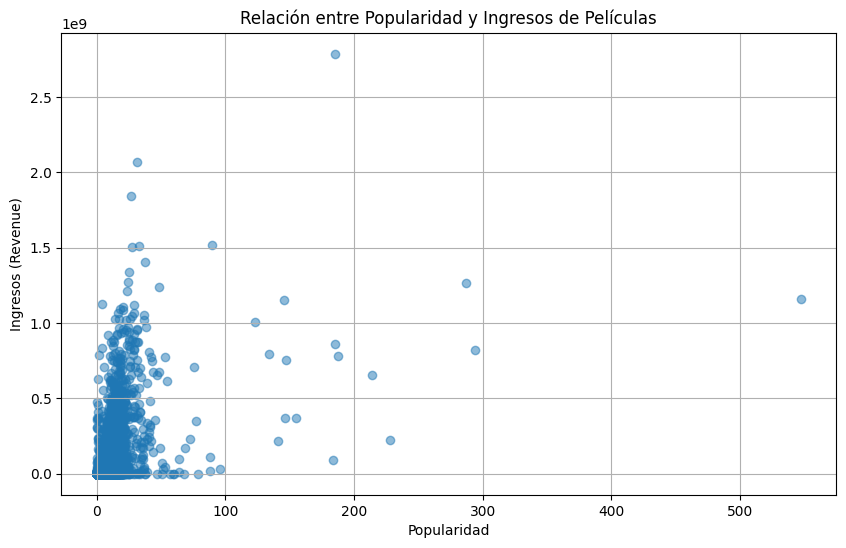

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


# gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['revenue'], alpha=0.5)
plt.xlabel('Popularidad')
plt.ylabel('Ingresos (Revenue)')
plt.title('Relación entre Popularidad y Ingresos de Películas')
plt.grid(True)


plt.show()


* Este gráfico de dispersión entre Ingresos - Popularidad nos permite ver cómo se distribuyen los ingresos de las películas en función de su popularidad.Los puntos tienden a agruparse cerca de una línea o exhiben algún patrón como vemos sobre todos, podría sugerir una relación entre estas dos variables. Un aumento en la popularidad podría estar relacionado con un aumento en los ingresos.

# Distribución de películas lanzadas desde 1950 hasta 2000 con grafico de Barras

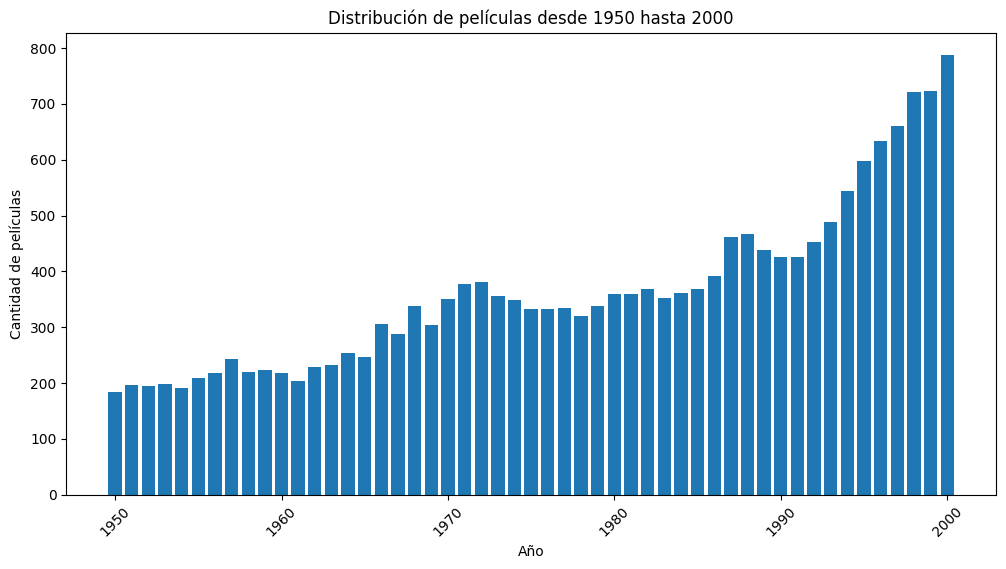

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


df_filtered = df[(df['release_year'] >= 1950) & (df['release_year'] <= 2000)]

# recuento de películas por año
year_counts = df_filtered['release_year'].value_counts()

# datos por año
year_counts = year_counts.sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas desde 1950 hasta 2000')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

plt.show()



# Distribución de películas desde 1950 hasta 2000 con un gráfico de líneas

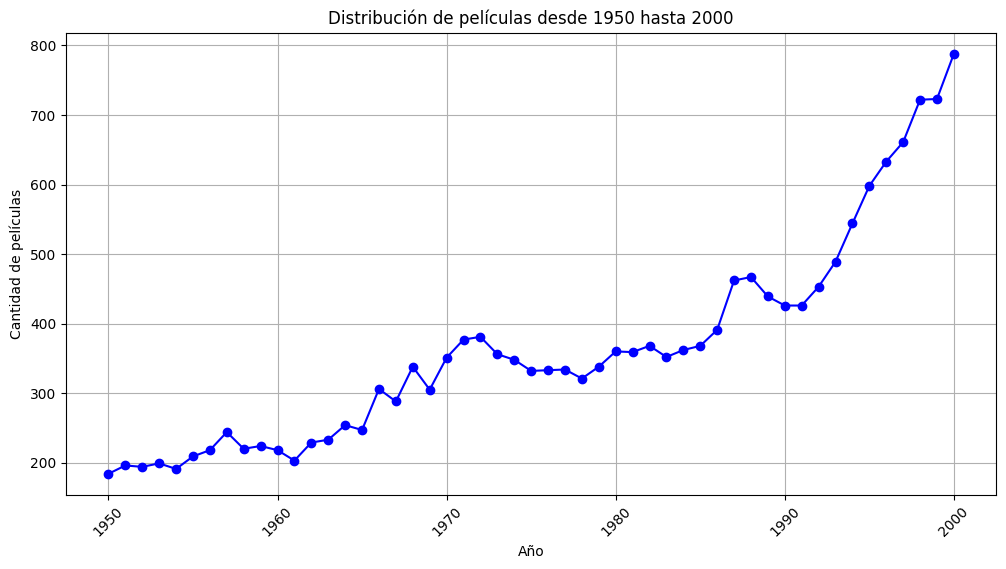

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df_filtered = df[(df['release_year'] >= 1950) & (df['release_year'] <= 2000)]

year_counts = df_filtered['release_year'].value_counts()

year_counts = year_counts.sort_index()

# gráfica de líneas
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de películas desde 1950 hasta 2000')
plt.xticks(rotation=45)  


plt.grid(True) 
plt.show()


* En este grafico podemos  ver latendencia o patrón en la cantidad de películas lanzadas a lo largo de ese periodo, es decir 1950 - 2000, donde se puede observar el aumento exponencial de peliculas a medidas a se acercaba al año 2000.

# GRAFICO ENTRE AÑO - INGRESO

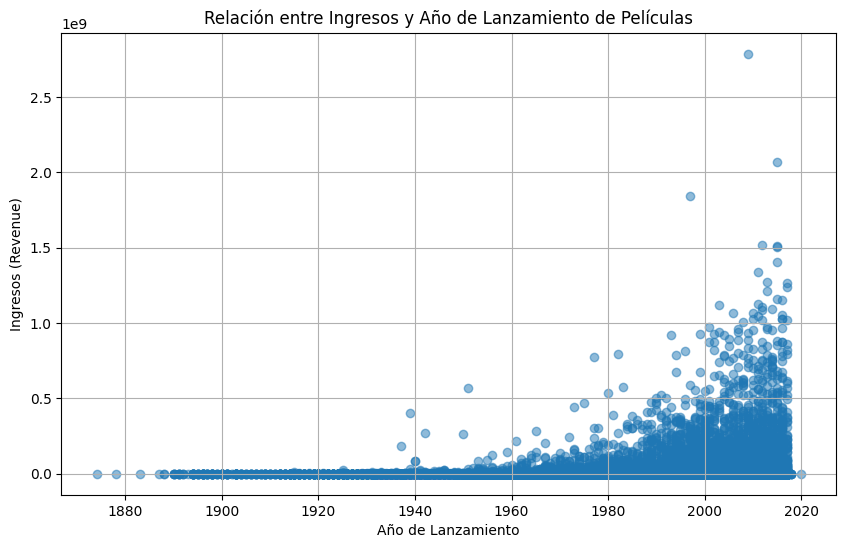

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


# gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['revenue'], alpha=0.5)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ingresos (Revenue)')
plt.title('Relación entre Ingresos y Año de Lanzamiento de Películas')
plt.grid(True)

plt.show()


* Con el gráfico de dispersión se puede observar como se distribuyen los ingresos de las películas en función de su año de lanzamiento. Donde dentificamos si una tendencia en los ingresos llegando a los años 2000, ya que los puntos tienden a agruparse.